Code for IE 534/ CS547 Homework 1 ---
Kiwook Lee, Akash Singh, Soumajit Dutta, Xuenan Mi

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                 delimiter=';', names=['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'])

In [16]:
X=data[["CIC0","SM1_Dz(Z)","GATS1i","MLOGP"]]
Y=data["LC50"]

Problem3.(1) Linear regression using sklearn

In [17]:
reg = LinearRegression().fit(X, Y)
print(f'The coefficients from sklearn library are:\n {list(reg.coef_)+[reg.intercept_]}')

The coefficients from sklearn library are:
 [0.4475016187556602, 1.2206813867391089, -0.7746396485025417, 0.3831006534437309, 2.1943526381758254]


Problem3.(2)  Estimate the coefficients from least square

In [13]:
X.insert(loc = 4, column = 'int_', value = 1)
##Based on the least square estimation, we get the formula coef = inverse(X'X)X'Y
coef2 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
print(f'The coefficients from explicit derivation are:\n {list(coef2)}')

ValueError: cannot insert int_, already exists

Problem3.(3) Gradient descent

In [8]:
##define a cost function using MSE
def cost_function(x, y, coef):
    N = len(y)
    J = np.sum((y - x.dot(coef))**2)/N
    return J
##define gradient descent function
def gradient_descent(x, y, coef, LR, iteration):
    cost = []
    N = len(y)
    for i in range(iteration):
        y_pred = x.dot(coef)
        loss = y - y_pred
        gradient = -2 * loss.dot(x)/N
        coef = coef - LR * gradient
        cost_val = cost_function(x, y, coef)
        cost.append(cost_val)
    return coef, cost
##inilatize the coefficients
coef = np.zeros(X.shape[1])
##Learning rate is 0.005 and 50000 iterations
coef3, cost = gradient_descent(X, Y, coef, 0.005, 50000)
print(f'The coefficients from gradient descent method:\n {list(coef3)}')

The coefficients from gradient descent method:
 [0.4475018436196318, 1.22068175537512, -0.7746390460835073, 0.3831007033465813, 2.194350820013661]


Text(0, 0.5, 'cost')

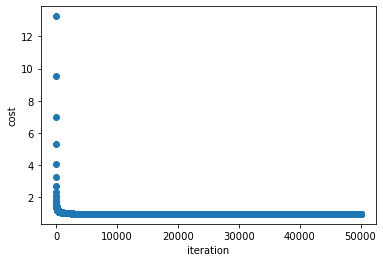

In [7]:
##plot for cost function
plt.scatter(range(50000),cost)
plt.xlabel("iteration")
plt.ylabel("cost")